#  Scikit-Learn

* 다양한 일반 알고리즘을 효율적으로 구현해서 제공하는 라이브러리
*  깔끔하고 일관되고 간결한 API와 유용하고 완전한 온라인 문서가 특징

## 1. Scikit-Learn에서의 데이터 표현방식

In [100]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [101]:
x_iris = iris.drop('species', axis=1)
y_iris = iris['species']
print(x_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


## 2. Scikit-Learn Estimator API


##### 일관성
* 모든 객체는 일관된 문서를 갖춘 제한된 메서드 집합에서 비롯된 공통 인터페이스를 공유한다.

##### 검사(inspection)
* 모든 지정된 모수(parameter)값은 공개(public)속성으로 노출된다.

##### 제한된 객체 계층구조
* 알고리즘만 파이썬 클래스에 의해 표현되고, 데이터 세트는 표준포맷(Numpy 배열, Pandas DataFrame, SciPy 희박행렬)으로 표현되며 매개변수명은 표준 파이썬 문자열을 사용한다. 

### API 기초

1. Scikit-Leanr으로부터 적절한 추정기(estimator)클래스를 임포트해서 모델의 클래스를 선택한다.
2. 이 클래스를 원하는 값으로 인스턴스화해서 모델의 초모수(hyperparameters)를 선택한다.
3. 데이터를 앞에서 논의한 내용에 따라 특징 배열과 대상벡터로 배치한다.
4. 모델 인스턴스으 fit()메서드를 호출해 모델을 데이터에 적합시킨다.
5. 모델을 새 데이터에 적용한다
 * 지도 학습인 경우, 대체로 predict()메서드를 사용해 알려지지 않은 데이터에 대한 레이블을 예측한다.
 * 비지도 학습인 경우, 대체로 transform()이나 predict()메서드를 사용해 데이터의 속성을 변환하거나 추론한다.

## 지도학습 예제: 선형회귀

In [102]:
import matplotlib.pyplot as plt
import numpy as np

(50,)
(50,)


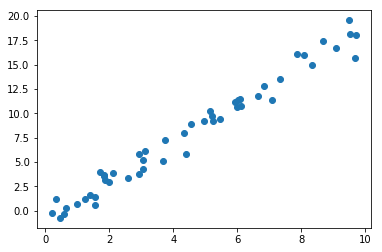

In [103]:
# 0. 샘플데이터 생성
rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2* x-1 + rng.randn(50)
plt.scatter(x,y)
print(x.shape)
print(y.shape)

In [104]:
# 1. 모델클래스 선택
from sklearn.linear_model import LinearRegression

# 2. 모델 초모수(하이퍼 파라미터) 선택 및 인스턴스 생성
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
# 특징행렬과 대상벡터로 배치
X = x[:, np.newaxis]
print(X.shape)
print(y.shape)

(50, 1)
(50,)


In [106]:
# 모델을 데이터에 적합
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
#계산된 결과를 모델전용속성에 저장되어 사용자가 탐색가능
model.coef_

array([1.9776566])

In [108]:
model.intercept_

-0.9033107255311146

In [109]:
# 5. 새로운 데이터 생성
xfit= np.linspace(-1, 11)

In [110]:
# 6. 알려지지 않은 데이터에 대한 레이블 예측
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

In [111]:
Xfit = Xfit.reshape(50, 1)

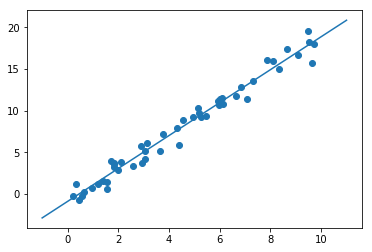

In [112]:
plt.scatter(x,y)
plt.plot(Xfit, yfit)

### 지도학습예제 : 붓꽃 분류

* 가우스 나이브 베이즈 (GNB, Gaussian Naive Bayes)로 알려진 매우 간단한 생성 모델을 사용.
* 각 클래스가 가우스 분포로 정렬된 축으로 부터 비롯된다고 가정.

In [113]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_iris,y_iris, random_state=1)

In [114]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [115]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_model, ytest)

0.9736842105263158

### 비지도 학습예제: 붓꽃 차원

* 주성분 분석 (PCA, principle component analysis) : 선형차원 축소기법
* 붓꽃 4차원 데이터 : 각 표본에 대한 특징이 4개
* 더 낮은 차원을 가지는 적절한 표현방식 찾기 4개-> 2개

In [117]:
from sklearn.decomposition import PCA #1. 모델 클래스 선택
model = PCA(n_components=2) #2. 인스턴스 생성
model.fit(x_iris) #3. 모델 적합, Y 미지정
X_2D = model.transform(x_iris) #4. 데이터를 2차원으로 변환

In [118]:
X_2D.shape

(150, 2)

In [119]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

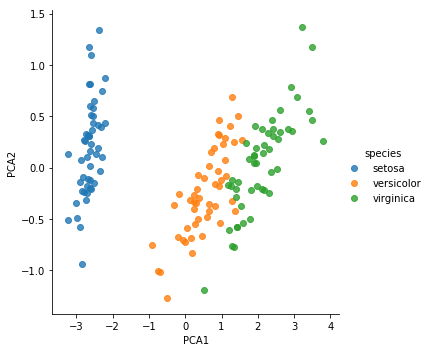

In [120]:
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

### 비지도 학습 예제: 붓꽃 군집화

* 가우스 혼합 모델(GMM, Gaussian mixture model)
* GMM을 사용하여 데이터들을 군집화 하고, 군집별로 그래프를 그려보면 PCA가 정확한지 알수 있다.

In [121]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(x_iris)
y_gmm = model.predict(x_iris)

In [122]:
y_gmm.shape

(150,)

In [123]:
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

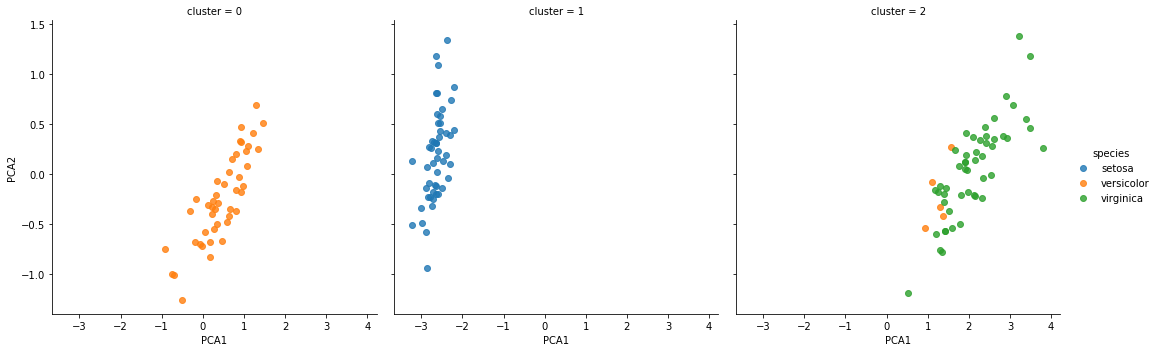

In [124]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

### 지도학습응용: 분류

In [125]:
from sklearn.datasets import load_digits
digits= load_digits()
digits.images.shape

(1797, 8, 8)

In [126]:
print(digits.data.shape) #X
print(digits.target.shape) #Y
print(digits.target_names.shape) #Y_label
print(digits.images.shape) #X.image

(1797, 64)
(1797,)
(10,)
(1797, 8, 8)


* 1797개의 표본과 64개의 특징이 있음

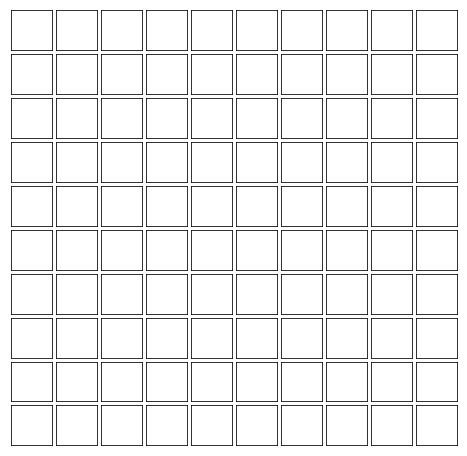

In [127]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))


In [128]:
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

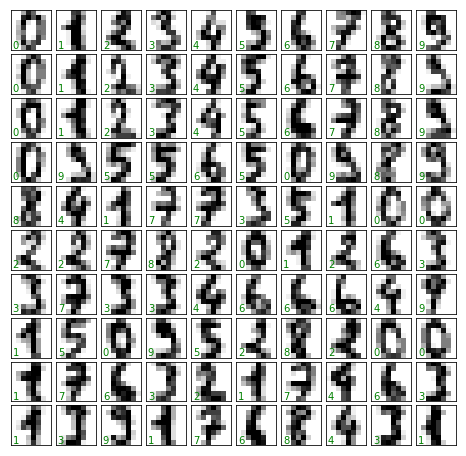

In [129]:
fig

#### 비지도학습: 차원축소
* 다양체 학습 알고리즘 (Manifold learning)
* 등거리 사상 (Isomap)

In [150]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 3)

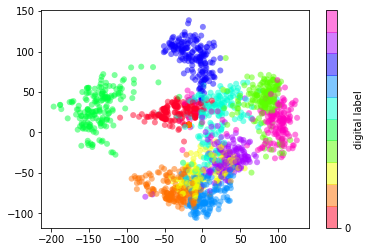

In [158]:
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target, edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.colorbar(label='digital label', ticks=range(1))

* 64차원 공간에서 얼마나 잘 구분되는지에 대한 직관을 2차원에제공
* 각 레이블중 0(빨강) 1(주황)이 정확히 분리됨을 알수 있음.

##### 숫자분류
* 붓꽃과 마찬가지로 가우스 나이브 베이즈 모델로 적합

In [139]:
X = digits.data
y = digits.target

In [140]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [141]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(91.68,0.5,'true value')

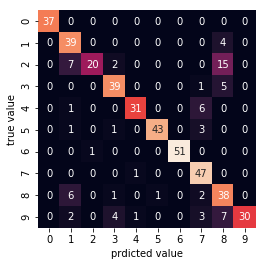

In [149]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('prdicted value')
plt.ylabel('true value')

* 2가 1이나 8로 잘못 분류 됬음을 알수 있다.

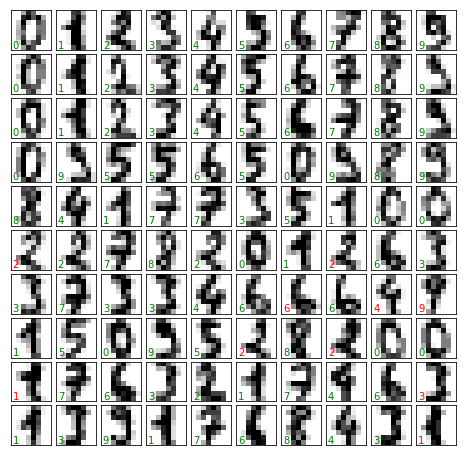

In [160]:
fig, axes = plt.subplots(10,10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), 
            transform=ax.transAxes, 
            color='green' if (ytest[i] == y_model[i]) else 'red')

## 초모수와 모델 검증

##### 검정표본 
* 데이터를 나누고 적합시키지 않은 데이터로 모델은 검증

In [164]:
X = digits.data
y = digits.target
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size = 0.5)
model.fit(X1, y1)
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.8342602892102335

##### 교차 검증

* 데이터를 반반 나눠서 시행/검증을 각각 한번씩 실행
* 두개의 정확도를 결합
* 2겹 교차검증

In [166]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.844097995545657, 0.8342602892102335)

* 5겹 교차 검증

In [167]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.78296703, 0.78176796, 0.79387187, 0.86554622, 0.8084507 ])

### 다항회귀

In [170]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [172]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1) ** 2
    y = 10 -1./(X.ravel()+0.1)
    if err>0:
        y += err*rng.randn(N)
        return X,y
X, y= make_data(40)

In [176]:
print(X.shape)
print(y.shape)
X

(40, 1)
(40,)


array([[1.73907352e-01],
       [5.18867376e-01],
       [1.30815988e-08],
       [9.14049845e-02],
       [2.15372915e-02],
       [8.52641608e-03],
       [3.46928663e-02],
       [1.19412216e-01],
       [1.57424429e-01],
       [2.90323473e-01],
       [1.75724041e-01],
       [4.69525764e-01],
       [4.18007224e-02],
       [7.71090232e-01],
       [7.50080261e-04],
       [4.49526682e-01],
       [1.74143298e-01],
       [3.12134324e-01],
       [1.97084925e-02],
       [3.92442000e-02],
       [6.41191864e-01],
       [9.37530479e-01],
       [9.82347155e-02],
       [4.79310604e-01],
       [7.68057946e-01],
       [8.00321082e-01],
       [7.23251789e-03],
       [1.52527609e-03],
       [2.88423714e-02],
       [7.71134256e-01],
       [9.67209972e-03],
       [1.77331632e-01],
       [9.17552352e-01],
       [2.84265221e-01],
       [4.78693941e-01],
       [9.95501134e-02],
       [4.71283524e-01],
       [6.96600012e-01],
       [3.34461088e-04],
       [5.62716493e-01]])

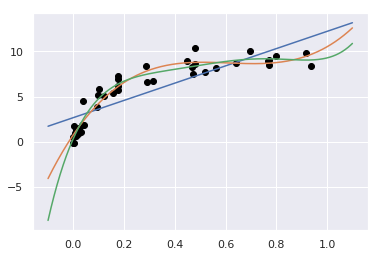

In [187]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set() #플롯 형식 지정

plt.scatter(X.ravel(),y, color='black')
axis = plt.axis()
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))

In [ ]:
from sklearn.model_s